In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import dask.dataframe as dd
import os
import matplotlib.pyplot as plt
import pycountry
import seaborn as sns

from names_dataset import NameDataset
from dask.distributed import Client

In [86]:
client = Client(n_workers=2)
client

/Users/francesco/opt/miniconda3/envs/name-clf/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57915 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:57915/status,
Dashboard: http://127.0.0.1:57915/status,Workers: 2
Total threads: 4,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57917,Workers: 2
Dashboard: http://127.0.0.1:57915/status,Total threads: 4
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:57929,Total threads: 2
Dashboard: http://127.0.0.1:57930/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:57920,


In [87]:
os.getcwd()

'/Users/francesco/REPOS/name-clf/app'

In [88]:
base_url = '/Users/francesco/REPOS/name-clf/app'

In [89]:
os.chdir(base_url)

In [90]:
from utils.dev_utils import load_raw_data
from utils.prod_utils import remove_digits_punctuation_doublespaces

In [91]:
nd = NameDataset()

In [92]:
country_codes = nd.get_country_codes(alpha_2=True)
print(country_codes)
country_mapping = {}
for country_code in country_codes:
    country_name = pycountry.countries.get(alpha_2=country_code).name
    country_mapping[country_code] = country_name

country_mapping

['AE', 'AF', 'AL', 'AO', 'AR', 'AT', 'AZ', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BN', 'BO', 'BR', 'BW', 'CA', 'CH', 'CL', 'CM', 'CN', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FR', 'GB', 'GE', 'GH', 'GR', 'GT', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LT', 'LU', 'LY', 'MA', 'MD', 'MO', 'MT', 'MU', 'MV', 'MX', 'MY', 'NA', 'NG', 'NL', 'NO', 'OM', 'PA', 'PE', 'PH', 'PL', 'PR', 'PS', 'PT', 'QA', 'RS', 'RU', 'SA', 'SD', 'SE', 'SG', 'SI', 'SV', 'SY', 'TM', 'TN', 'TR', 'TW', 'US', 'UY', 'YE', 'ZA']


{'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AL': 'Albania',
 'AO': 'Angola',
 'AR': 'Argentina',
 'AT': 'Austria',
 'AZ': 'Azerbaijan',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia, Plurinational State of',
 'BR': 'Brazil',
 'BW': 'Botswana',
 'CA': 'Canada',
 'CH': 'Switzerland',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CO': 'Colombia',
 'CR': 'Costa Rica',
 'CY': 'Cyprus',
 'CZ': 'Czechia',
 'DE': 'Germany',
 'DJ': 'Djibouti',
 'DK': 'Denmark',
 'DZ': 'Algeria',
 'EC': 'Ecuador',
 'EE': 'Estonia',
 'EG': 'Egypt',
 'ES': 'Spain',
 'ET': 'Ethiopia',
 'FI': 'Finland',
 'FJ': 'Fiji',
 'FR': 'France',
 'GB': 'United Kingdom',
 'GE': 'Georgia',
 'GH': 'Ghana',
 'GR': 'Greece',
 'GT': 'Guatemala',
 'HK': 'Hong Kong',
 'HN': 'Honduras',
 'HR': 'Croatia',
 'HT': 'Haiti',
 'HU': 'Hungary',
 'ID': 'Indonesia',
 'IE': 'Ireland',
 'IL': 'Israel',
 'IN': 'India

In [93]:
subset = ("ES", "FR", "DE")#, "GB")
europe = dict(filter(lambda i:i[0] in subset, country_mapping.items()))
print(europe)


{'DE': 'Germany', 'ES': 'Spain', 'FR': 'France'}


In [94]:
top = 100

In [95]:
entries = {}
names = []
countries = []
genders = []
for key, value in europe.items():
    print(key)
    results = nd.get_top_names(n=top, country_alpha2=key)
    print(results)
    for name_male in results[key]["M"]:
        names.append(name_male)
        countries.append(value)
        genders.append("Male")

    for name_female in results[key]["F"]:
        names.append(name_female)
        countries.append(value)
        genders.append("Female")

entries["Name"] = names
entries["Country"] = countries
entries["Gender"] = genders

print(entries)
    

DE
{'DE': {'M': ['Michael', 'Thomas', 'Andreas', 'Christian', 'Stefan', 'Daniel', 'Peter', 'Frank', 'Markus', 'Martin', 'Sebastian', 'Alexander', 'Andrea', 'Sven', 'Matthias', 'Marcel', 'Patrick', 'Tobias', 'Jens', 'Marco', 'Jürgen', 'Uwe', 'Dirk', 'Jan', 'Ralf', 'Florian', 'Klaus', 'Wolfgang', 'Oliver', 'Dennis', 'Bernd', 'Jörg', 'Kevin', 'Mario', 'Robert', 'Sascha', 'Christoph', 'Stephan', 'Steffen', 'Max', 'Tim', 'Andre', 'Philipp', 'Marc', 'Chris', 'Nico', 'Simone', 'Dieter', 'Torsten', 'Manfred', 'Rene', 'Dominik', 'Heiko', 'Maik', 'Holger', 'Manuel', 'Kai', 'Mike', 'Thorsten', 'Rainer', 'Fabian', 'Lars', 'Lukas', 'Felix', 'Marcus', 'Benjamin', 'Paul', 'Hans', 'Tom', 'Carsten', 'Johannes', 'Werner', 'Timo', 'Ronny', 'Volker', 'Roland', 'Simon', 'Pascal', 'Norbert', 'Julian', 'Gabriele', 'Olaf', 'Harald', 'Mehmet', 'Ingo', 'Helmut', 'Joachim', 'Björn', 'André', 'Jonas', 'Mustafa', 'René', 'Mathias', 'Axel', 'Gerhard', 'Andy', 'Karsten', 'Horst', 'Leon', 'Georg'], 'F': ['Nicole', 'S

In [117]:
df = dd.from_dict(entries, npartitions=10).compute()
print(df.shape)
df.head()

(600, 3)


,Name,Country,Gender
0,Michael,Germany,Male
1,Thomas,Germany,Male
2,Andreas,Germany,Male
3,Christian,Germany,Male
4,Stefan,Germany,Male


In [118]:
print(df.isna().sum())


Name       0
Country    0
Gender     0
dtype: int64


Male      300
Female    300
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

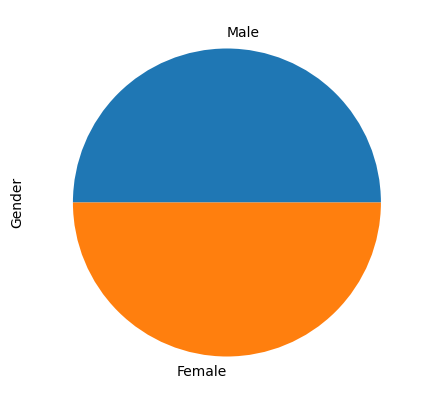

In [119]:
print(df["Gender"].value_counts())
df["Gender"].value_counts().plot(kind='pie', figsize=(5,5))

Germany    200
Spain      200
France     200
Name: Country, dtype: int64


<AxesSubplot:ylabel='Country'>

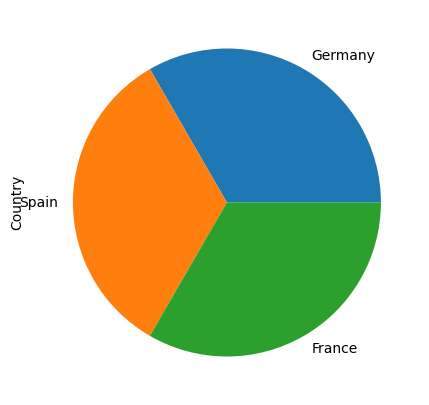

In [120]:
print(df.Country.value_counts())
df.Country.value_counts().plot(kind='pie', figsize=(5,5))

<AxesSubplot:xlabel='Country', ylabel='Count'>

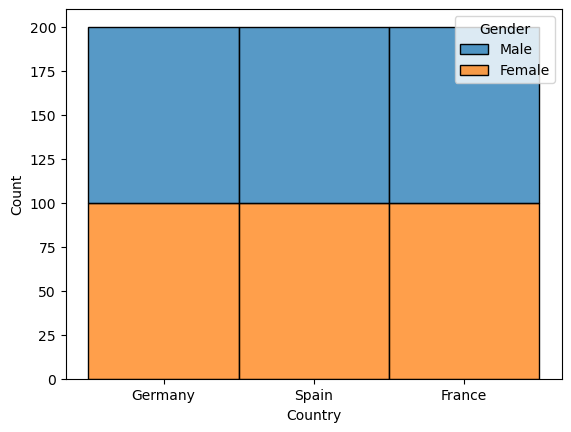

In [121]:
sns.histplot(data=df, x="Country", hue="Gender", multiple="stack")

In [122]:
dups = df[df.duplicated(subset=["Name"], keep=False)]
print(len(dups))
print(dups)

122
           Name  Country  Gender
0       Michael  Germany    Male
1        Thomas  Germany    Male
3     Christian  Germany    Male
5        Daniel  Germany    Male
12       Andrea  Germany    Male
..          ...      ...     ...
579  Christiane   France  Female
587  Jacqueline   France  Female
590    Jennifer   France  Female
592        Lisa   France  Female
599      Marina   France  Female

[122 rows x 3 columns]


In [123]:
client.shutdown()